In [215]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

In [216]:
import math
from math import *

In [217]:
def f(x1, x2):
    return 3/8*x1**3 + (1/3)*x2**4 - x1*(x2**2) - 2*((x1**2) + x2) + 3*(x2**3 - x1)

In [218]:
def gradient(x1, x2):
    df_dx1 = 9/8*x1**2 - 4*x1 - x2**2 - 3
    df_dx2 = 4/3*x2**3 + 9*x2**2 - 2*x1*x2 - 2
    return np.array([df_dx1, df_dx2])

In [219]:
def norm(matrice_1x2):
    n_line = matrice_1x2.shape[0]
    N = 0
    for i in range(n_line):
        N += matrice_1x2[i]**2
    return math.sqrt(N)

In [220]:
# iniciamos con valores random
x1, x2 = 0, 1

In [221]:
# step del algoritmo | learning rate
t = 0.1

In [222]:
# threshold para stop del algoritmo
epsilon = pow(10,-8)

In [223]:
grad_f = gradient(x1, x2)
n_grad = norm(grad_f)
i = 1
evolution_X1_X2 = [[x1, x2]]

In [224]:
# comenzamos GD
while n_grad > epsilon:  
    direction = -grad_f
    x1, x2 = x1 + t*direction[0], x2 + t*direction[1] 
    evolution_X1_X2 = np.vstack((evolution_X1_X2, [x1, x2]))
    grad_f = gradient(x1, x2)
    n_grad = norm(grad_f)
    i +=1

In [225]:
evolution_X1 = evolution_X1_X2[:, 0]
evolution_X2 = evolution_X1_X2[:, 1]

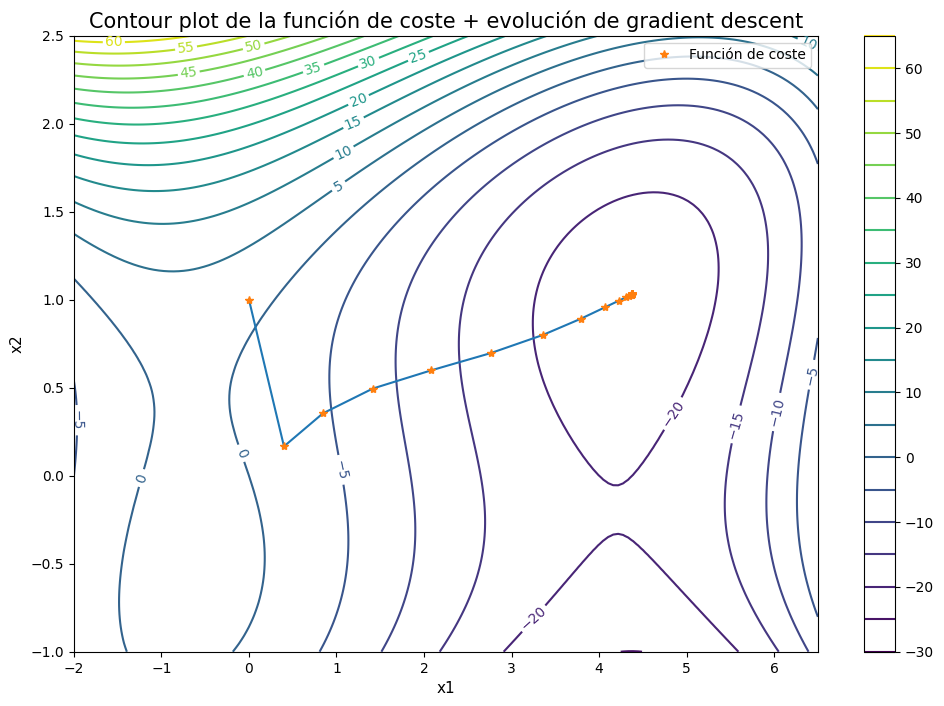

In [247]:
x1 = np.linspace(-2, 6.5, 150)
x2 = np.linspace(-1, 2.5, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize = (12, 8))
contours = plt.contour(X1, X2, Z, 20)
plt.clabel(contours, inline = True, fontsize = 10)
plt.title("Contour plot de la función de coste + evolución de gradient descent", fontsize=15)
plt.plot(evolution_X1, evolution_X2)
plt.plot(evolution_X1, evolution_X2, '*', label = "Función de coste")
plt.xlabel('x1', fontsize=11)
plt.ylabel('x2', fontsize=11)
plt.colorbar()
plt.legend(loc = "upper right")
plt.show()
fig.savefig("images/contour_plot.png")

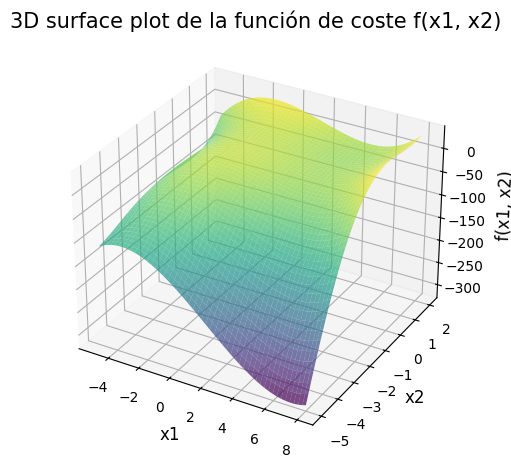

In [246]:
x1 = np.linspace(-5, 8, 250)
x2 = np.linspace(-5, 2, 150)
X1, X2 = np.meshgrid(x1, x2)
Z = f(X1, X2)
fig = plt.figure(figsize=(16, 16))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.7)
ax.set_xlabel('x1', fontsize=12)
ax.set_ylabel('x2', fontsize=12)
ax.set_zlabel('f(x1, x2)', fontsize=12, labelpad=8)
ax.set_title("3D surface plot de la función de coste f(x1, x2)", fontsize=15)
fig.subplots_adjust(left=0.64, right=0.9, bottom=0.1, top=0.9)
fig.savefig("images/3d_cost_f.png")
plt.show()